In [23]:
# Step 1: Import libraries and load dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/shalakasaraogi/credit-card-fraud-detection/refs/heads/main/csv%20files/creditcard.csv"
df = pd.read_csv(url)

# Show first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)

# View basic info about data types and null values
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (20000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20000 non-null  int64  
 1   V1      20000 non-null  float64
 2   V2      20000 non-null  float64
 3   V3      20000 non-null  float64
 4   V4      20000 non-null  float64
 5   V5      20000 non-null  float64
 6   V6      20000 non-null  float64
 7   V7      20000 non-null  float64
 8   V8      20000 non-null  float64
 9   V9      20000 non-null  float64
 10  V10     20000 non-null  float64
 11  V11     20000 non-null  float64
 12  V12     20000 non-null  float64
 13  V13     20000 non-null  float64
 14  V14     20000 non-null  float64
 15  V15     20000 non-null  float64
 16  V16     20000 non-null  float64
 17  V17     20000 non-null  float64
 18  V18     20000 non-null  float64
 19  V19     20000 non-null  float64
 20  V20     20000 non-null  float64
 21  V21     

In [11]:
# Count of fraud vs non-fraud
print("\nClass Distribution:\n", df['Class'].value_counts())

# Percentage distribution
print("\nClass Distribution (%)\n", df['Class'].value_counts(normalize=True) * 100)



Class Distribution:
 Class
0    19936
1       64
Name: count, dtype: int64

Class Distribution (%)
 Class
0    99.68
1     0.32
Name: proportion, dtype: float64


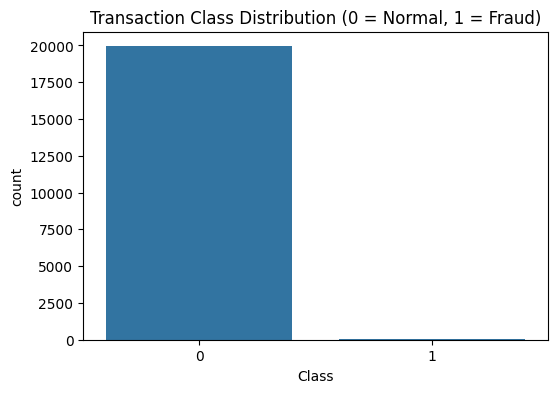

In [13]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class')
plt.title("Transaction Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()

In [15]:

# Scale the 'Amount' column
df['Amount_scaled'] = StandardScaler().fit_transform(df[['Amount']])

# Optional: drop 'Time' and 'Amount' if not needed
df = df.drop(['Time', 'Amount'], axis=1)

# Check the updated data
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.188357
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.368725
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.056757
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.089324
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.113558


In [19]:
# Features (X) and Target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data (stratify=y to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (16000, 29)
Test set size: (4000, 29)


In [22]:

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [24]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9970

Confusion Matrix:
 [[3986    1]
 [  11    2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3987
           1       0.67      0.15      0.25        13

    accuracy                           1.00      4000
   macro avg       0.83      0.58      0.62      4000
weighted avg       1.00      1.00      1.00      4000



In [25]:
# Separate normal and fraud transactions
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

# Under-sample normal transactions to match fraud count
normal_sample = normal.sample(n=len(fraud), random_state=42)

# Combine the balanced dataset
balanced_df = pd.concat([fraud, normal_sample], axis=0)

# Shuffle the rows
balanced_df = balanced_df.sample(frac=1, random_state=42)

# Show class distribution after balancing
print("Balanced class distribution:\n", balanced_df['Class'].value_counts())


Balanced class distribution:
 Class
1    64
0    64
Name: count, dtype: int64


In [26]:
# Features and target
X_balanced = balanced_df.drop('Class', axis=1)
y_balanced = balanced_df['Class']

# Train-test split (for balanced data)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Train logistic regression
model_b = LogisticRegression(max_iter=1000)
model_b.fit(X_train_b, y_train_b)

# Predict
y_pred_b = model_b.predict(X_test_b)


In [27]:

# Accuracy
accuracy_b = accuracy_score(y_test_b, y_pred_b)
print(f"Balanced Model Accuracy: {accuracy_b:.4f}")

# Confusion Matrix
cm_b = confusion_matrix(y_test_b, y_pred_b)
print("\nConfusion Matrix:\n", cm_b)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test_b, y_pred_b))

Balanced Model Accuracy: 0.7308

Confusion Matrix:
 [[15  4]
 [ 3  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.50      0.57      0.53         7

    accuracy                           0.73        26
   macro avg       0.67      0.68      0.67        26
weighted avg       0.74      0.73      0.74        26

